# **Compressed Sensing 2021 Project : Dictionary Learning**
Hugo Chardon & Théo Jolivet

## 1 General framework of Dictionary Learning

### 1.1 One dictionary to learn them all

In the classical setting of dictionary learning, we consider a signal $\mathbf{x}\in \mathbb{R}^N$ and we want to represent it in a basis in which it has a sparse representation. The key idea is to write $\mathbf{x}$ as a linear combination of $k$ other vectors lying in $\mathbb{R}^N$, called _atoms_ of a predefined _dictionary_. Such a dictionary will be denoted by a matrix $\mathbf{D}=[\mathbf{d}_1, \dots, \mathbf{d}_k ] \in \mathbb{R}^{N\times k}$, and we want to find the coefficients $\alpha_1, \dots, \alpha_k$ such that $\sum_{i=1}^k \alpha_i \mathbf{d}_i$ is relatively close to $\mathbf{x}$ in $\ell_2$-norm. More precisely, we aim at minimizing : 

$$
\underset{\boldsymbol{\alpha} \in \mathbb{R}^k}{\min} \ \dfrac{1}{2} \lVert \mathbf{x} - \mathbf{D} \boldsymbol{\alpha} \rVert_2^2
$$

In order to enforce a sparse representation of $\mathbf{x}$ in such a dictionary, we penalize the $\ell_1$-norm of the $\boldsymbol{\alpha}$'s as in the LASSO estimator. We denote $l(\mathbf{x},\mathbf{D})$ the optimal value of the $\ell_1$-_sparse coding_ problem :

$$
l(\mathbf{x},\mathbf{D}) = \underset{\boldsymbol{\alpha} \in \mathbb{R}^k}{\min} \ \dfrac{1}{2} \lVert \mathbf{x}-\mathbf{D}\boldsymbol{\alpha}\lVert_2^2 \ + \ \lambda\lVert\boldsymbol{\alpha}\lVert_1
$$

To compute the dictionary, we usually have access to $n$ observations following a distribution $p(\mathbf{x})$, stored in $\mathbf{X} = [\mathbf{x}_1, \dots ,\mathbf{x}_n] \in \mathbb{R}^{N \times n} $, and we then minimize the _empirical risk_ $f_n(\mathbf{D}) = \dfrac{1}{n} \sum_{i=1}^n l(\mathbf{x}_i,\mathbf{D})$. Recall that we aim at minimizing the _expected  risk_ $f(\mathbf{D}) = \mathbb{E}_{\mathbf{x}}[l(\mathbf{x},\mathbf{D})]$ which is linked to $f_n$ by $f(\mathbf{D}) = \underset{n \to + \infty}{\lim} f_n(\mathbf{D})$.

Famous examples of such dictionaries that are widely used in signal processing are the wavelets or Fourier basis, in which we can find a sparse representation of $\mathbf{x}$.

### 1.2 Adaptive Dictionary

Notable applications in signal processing (denoising, inpainting, etc...) and unsupervised data modeling (recommender systems, document clustering, etc...) called for more scalable and efficient matrix-factorization methods. Adaptive dictionaries were thus introduced in recent years to learn the dictionary instead of using a predefined one, and the optimization now seeks to find the coefficients $\boldsymbol{\alpha}$ as well as the dictionary $\mathbf{D}$.

To avoid having arbitrarily large values for the columns of the dictionary (and thus an arbitrarily small $\boldsymbol{\alpha}$), we only consider dictionaries which columns have a $\ell_2$-norm of one at most, that is, dictionaries in the set $\mathcal{C} = \{ \mathbf{D} \in \mathbb{R}^{N \times k} \ \text{s.t.} \ \forall j = 1,...,k; \ \mathbf{d}_j^T \mathbf{d}_j \leq 1 \}$. We can then rewrite the problem as a joint optimization problem : 

$$
\underset{\mathbf{D} \in \mathcal{C}, \ \alpha \in \mathbb{R}^{k \times n}}{\min} \ \dfrac{1}{n} \sum_{i=1}^n \left(\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 \right)
$$

which is convex with respect to both variables when the other is fixed. We optimize the objective function with respect to both the dictionary $\mathbf{D} \in \mathbb{R}^{N \times k}$ and the coefficients $\boldsymbol{\alpha} = [\boldsymbol{\alpha}_1,...,\boldsymbol{\alpha}_n] \in \mathbb{R}^{k \times n}$. Usually, $k$ is a multiple of 2, such as 256, 512 or 1024. Dictionaries with $k>N$ are called _overcomplete_ dictionaries.

## 2 Simultaneous dictionary learning and classification (based on _Supervised Dictionary Learning_,  NeurIPS '08)

We introduce here the core idea presented in the article. Rather than first creating a sparse representation of the data through dictionary representation and then performing a classical task such as classification on the projected data, the authors propose to perform both tasks simultaneously. Without loss of generality, we will focus on binary classification (generalization is not difficult but the core ideas would remain the same with added technicalities).

### 2.1 Standard classification task

We have $n$ data points $\mathbf{x}_1, ..., \mathbf{x}_n$ endowed with labels $y_i = \pm 1$. We want to learn a function $f(\mathbf{x}, \boldsymbol{\alpha}, \boldsymbol{\theta})$ (namely, the parameter $\boldsymbol{\theta}$) generally referred to as a soft classifier, such that $\forall i$, $\mathrm{sgn}(f(\mathbf{x}_i)) = y_i$. The parameter $\boldsymbol{\theta}$ can be learned as the result of the following optimization procedure :

$$
\underset{\boldsymbol{\theta}}{\min} \ \sum_{i=1}^n c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_2 \lVert \boldsymbol{\theta} \rVert_2^2
$$

with $c(u)= \log(1+e^{-u})$ the logistic loss (convex surrogate of the 0-1 loss).

### 2.2 Simultaneous learning

We create a mixed objective function that contains both a classification loss component and a dictionary learning one.

$$
\underset{\mathbf{D}, \boldsymbol{\theta}, \boldsymbol{\alpha}}{\min} \ \sum_{i=1}^n \left(c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_0 \lVert \mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \rVert_2^2 + \lambda_1 \lVert \boldsymbol{\alpha}_i \rVert_1\right) + \lambda_2 \lVert \boldsymbol{\theta} \rVert_2^2 \qquad (*)
$$

which can be rewritten as (when solving for $\boldsymbol{\alpha}$ first)

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i) + \lambda_2 \lVert \boldsymbol{\theta} \rVert_2^2 \qquad
$$

with 

$$
\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i) = \underset{\boldsymbol{\alpha}_i}{\min} \ \mathcal{S}(\boldsymbol{\alpha}_i, \mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)
$$

where 

$$
\mathcal{S}(\boldsymbol{\alpha}_i, \mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i) = c(y_i f(\mathbf{x_i}, \boldsymbol{\alpha_i}, \boldsymbol{\theta})) + \lambda_0 \lVert \mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \rVert_2^2 + \lambda_1 \lVert \boldsymbol{\alpha}_i \rVert_1
$$

Note that $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)$ is the loss for a single pair of observations $(\mathbf{x}_i, y_i)$.

#### 2.2.1 A more discriminative approach


In order to make the overall model more disriminative between the two classes we want to construct our dictionary such that the loss for a wrong prediction $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i)$ is bigger than the loss for a correct prediction $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)$. The key point here being that the loss itself depends on the dictionary $\mathbf{D}$ and the codes $\boldsymbol{\alpha}_i$'s. We formulate this new idea in the following optimization problem : 

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n c\left(\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i) - \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right) + \lambda_2 \lVert \boldsymbol{\theta} \rVert^2
$$

#### 2.2.2 The trade-off

This last problem is harder to solve than $(*)$ so we compromise between the two and introduce a trade-off parameter $\mu$ to solve a composite optimization problem :

$$
\underset{\mathbf{D}, \boldsymbol{\theta}}{\min} \ \sum_{i=1}^n \left[ \mu \, c\left(\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i) - \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right) + (1-\mu) \, \mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)\right] + \lambda_2 \lVert \boldsymbol{\theta} \rVert^2 \qquad (**)
$$

Since $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, -y_i)$ is bigger than $\mathcal{S}^*(\mathbf{x}_i, \mathbf{D}, \boldsymbol{\theta}, y_i)$, we have a positive term as an argument of the cost function, and we aim at minimizing it.

#### 2.2.3 From learnt dictionary to classification

Once we have learnt both the dictionary and the classifier's parameters, we use them to predict the labels of test examples. Given a new example $\mathbf{x}$, its label is predicted by comparing $\mathcal{S}^*(\mathbf{x}, \mathbf{D}, \boldsymbol{\theta}, -1)$ and $\mathcal{S}^*(\mathbf{x}, \mathbf{D}, \boldsymbol{\theta}, 1)$. The attributed label is the one for which $\mathcal{S}^*$ is the lowest. Therefore, we note that a new prediction requires to compute the dictionary representation of the new example : what we refer to as _supervised sparse coding_. 

### 2.3 Implementation

Solving the optimization problem $(**)$ is carried out by alternate block coordinate descent. We alternate between :

(i) _Supervised sparse coding_ : this step aims at computing the representations $\boldsymbol{\alpha}_i$'s of the datapoints $\mathbf{x}_i$ in the dictionary $\mathbf{D}$ with the classifier's parameter $\boldsymbol{\theta}$ fixed. This step amounts to computing the above-defined $\mathcal{S^*}$ and the $\boldsymbol{\alpha}$ that minimizes it, for both $y_i$ and $-y_i$.

(ii) _Supervised dictionary update_ : this time, the $\boldsymbol{\alpha}_i$'s are fixed and we want to update the dictionary $\mathbf{D}$ and the classifier's parameter $\boldsymbol{\theta}$.


Regarding the step $(i)$ in the algorithm described above, the authors suggest using a method known as _fixed-point continuation method_ which is a very general framework for this class of optimization problems. We will solve it using the python library cvxpy (in which the optimization method used is not specified). We code our optimization method for step $(ii)$ from scratch.

Below, we describe and implement the _Supervised Dictionary Learning_ (SDL) algorithm proposed by the authors. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
from numpy import random as rd
from keras.datasets import mnist
from sklearn.feature_extraction import image
from sklearn.linear_model import Lasso
from sklearn.metrics import f1_score
from time import time
import tqdm

In the cell below we define some elementary functions and an optimization procedure used to compute the step $(i)$ (Supervised sparse coding) :

In [3]:
# Supervised sparse coding

def objective(alpha, x, D, w, b, y, lambda0=1e-3, lambda1=1e-3):
    """Compute objective function. w and b are the linear classifier parameters, they are fixed for this step."""
    return cp.logistic(- y * (cp.sum(cp.scalar_product(w, alpha)) + b)) + lambda0 * cp.norm2(x - D @ alpha) ** 2 + lambda1 * cp.norm1(alpha)


def supervised_sparse_coding(x, D, w, b, y, reconstruction_param, regularization_param, require_opt_value=False):
    """ Compute the vector alpha. This function will be used in the main algorithm.

        :param x: the observation of which we want the dictionary representation
        :param D: dictionary
        :param w: weights of the function f
        :param b: bias of the function f
        :param y: labels of the observations
        :param reconstruction_param: reconstruction error parameter
        :param regularization_param: l1 regularization parameter

        :return: coefficients alpha (if require_opt_value is False) or minimal value of the objective (if require_opt_value is True)
    """

    k = D.shape[1] # Number of atoms in the dictionary = number of columns in D
    alpha = cp.Variable(k)
    lambda0 = cp.Parameter(nonneg=True)
    lambda1 = cp.Parameter(nonneg=True)

    problem = cp.Problem(cp.Minimize(objective(alpha, x, D, w, b, y, lambda0, lambda1)))

    lambda0.value = reconstruction_param
    lambda1.value = regularization_param

    problem.solve(solver=cp.SCS, max_iters=5000)
    #problem.solve(solver='CVXOPT')

    # In some cases we need the optimal value S^*, in some other cases we need the optimal alpha (i.e. argmin)

    if require_opt_value:
        return problem.value
    else:
        return alpha.value


def make_prediction(x, D, w, b, reconstruction_param, regularization_param):
    """Predicts the label of a new test sample."""
    
    pos_loss = supervised_sparse_coding(x, D, w, b, 1, reconstruction_param, regularization_param, require_opt_value=True)
    neg_loss = supervised_sparse_coding(x, D, w, b, -1, reconstruction_param, regularization_param, require_opt_value=True)

    predicted_label = 1 if pos_loss < neg_loss else -1 # Pseudo-classifier as a plug-in
    
    return predicted_label

In [4]:
# Test of alphas update

N = 1000
k = 100

test_vector = rd.randn(N)
dictionary = rd.randn(N, k)

w = rd.randn(k)
b = rd.randn()

lambda0_test = 0.5
lambda1_test = 0.15 * lambda0_test

alpha_opt = supervised_sparse_coding(
    x=test_vector,
    D=dictionary,
    w=w,
    b=b,
    y=1,
    reconstruction_param=lambda0_test,
    regularization_param=lambda1_test
    )

random_alpha = rd.randn(k)

print('Reconstruction with a random alpha: ', 1 / N * np.sum((test_vector - dictionary @ random_alpha) ** 2))
print('Reconstruction with the optimal alpha: ', 1 / N * np.sum((test_vector - dictionary @ alpha_opt) ** 2))

Reconstruction with a random alpha:  126.99084392928204
Reconstruction with the optimal alpha:  0.8546604210549347


/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Let's test the above code to compute $\boldsymbol{\alpha}$ for a random dictionary, and we compare them with random coefficients. The reconstruction error is lower with the optimized coefficients, showing that the learnt coefficients (alpha_opt) perform better at the reconstruction task.

Then we define the functions needed to compute step $(ii)$ (Supervised dictionary update). We will perform the update of $\mathbf{D}$ and $\boldsymbol{\theta}$ by solving the above stated minimization problem. 

In [5]:
# Utils used in supervised dictionary and parameters update

def logistic(u):
    return np.log(1 + np.exp(-u))


def deriv_logistic(u):
    return - 1 / (1 + np.exp(u))


def cal_S(alpha, x, D, w, b, y, lambda0, lambda1):
    return logistic(y * (np.dot(w, alpha) + b)) + lambda0 * np.linalg.norm(x - D @ alpha) ** 2 + lambda1 * np.linalg.norm(alpha, ord=1)


def compute_omega(z, mu, alpha_star_neg, alpha_star_pos, x, D, w, b, y, lambda0, lambda1):
    S_neg = cal_S(alpha_star_neg, x, D, w, b, -y, lambda0, lambda1)
    S_pos = cal_S(alpha_star_pos, x, D, w, b, y, lambda0, lambda1)
    omega = - mu * z * deriv_logistic(S_neg - S_pos)
    
    if z == y:
        omega += 1 - mu

    return omega


def compute_gradient(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1):
    ''' Compute partial gradients for dictionary, weights and bias update.
    
    :param X: the whole dataset given as a matrix. We assume that each data point is a column of X so we have to be careful
            regarding the potential need to transpose the input matrix
    :param D: dictionary
    :param w: weights of the classifier
    :param b: bias of the classifier
    :param y: labels associated with each observation, {-1,1} convention
    :param alpha_star_neg: best alpha if the label was negative
    :param alpha_star_neg: best alpha if the label was positive
    :param mu: classification/generation tradeoff
    :param lambda0: reconstruction regularization parameter
    :param lambda1: l1 regularization parameter

    :return: partial gradients with respect to dictionary, weights, bias
    '''

    partial_grad_dict = np.zeros_like(D)
    partial_grad_weights = np.zeros_like(w)
    partial_grad_bias = np.zeros_like(b)

    for i in range(len(X)):
        omega_i_neg = compute_omega(-1, mu, alpha_star_neg, alpha_star_pos, X[i], D, w, b, y[i], lambda0, lambda1)
        omega_i_pos = compute_omega(1, mu, alpha_star_neg, alpha_star_pos, X[i], D, w, b, y[i], lambda0, lambda1)

        partial_grad_dict += omega_i_pos * np.outer(X[i] - D @ alpha_star_pos, alpha_star_pos) + omega_i_neg * np.outer(X[i] - D @ alpha_star_neg, alpha_star_neg)
        partial_grad_weights += omega_i_pos * deriv_logistic(np.dot(w, alpha_star_pos) + b) * alpha_star_pos - omega_i_neg * deriv_logistic(np.dot(w, alpha_star_neg) + b) * alpha_star_neg
        partial_grad_bias += omega_i_pos * deriv_logistic(np.dot(w, alpha_star_pos) + b) - omega_i_neg * deriv_logistic(np.dot(w, alpha_star_neg) + b)

    partial_grad_dict *= -2 * lambda0
    
    return partial_grad_dict, partial_grad_weights, partial_grad_bias

To perform part $(ii)$ described above, we also use a projected gradient descent. The projection is only done for the dictionaries, by normalizing its columns if necessary (replacing the $j$-th column $\mathbf{d}_j$ by $\frac{\mathbf{d}_j}{\lVert \mathbf{d}_j \rVert_2}$ if $\lVert \mathbf{d}_j \rVert_2 > 1$).

In [6]:
# Supervised dictionary and parameters update

def update_dict_and_params(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1, maxiter=20, lr=0.5):
    """ (projected) gradient descent on D, w and b (theta is just a packing of (w,b))."""

    for t in range(maxiter):
        partial_grad_dict, partial_grad_weights, partial_grad_bias = compute_gradient(X, D, w, b, y, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1)
        D -= lr * partial_grad_dict
        w -= lr * partial_grad_weights
        b -= lr * partial_grad_bias
        
        k = D.shape[1] # Number of atoms in the dictionary
        
        for j in range(k):
            D[:,j] = D[:,j] / max(np.linalg.norm(D[:,j]), 1)
        
        return D, w, b

Now we can implement the main algorithm, which amounts to looping over different values of the trade-off parameter $\mu$ and then iterating until convergence, alternating between $(i)$ and $(ii)$.

In [7]:
# Global function combining steps (i) and (ii)

def supervised_dictionnary_learning(mus, X_train, X_test, y_train, y_test, k, lambda0, lambda1, lambda2, global_maxiter):
    ''' Global function performing both alphas update and dictionary/parameters updates.
        Learns a dictionary, the coefficients, and a classifier.

    :param mus: array of parameters for classification/generation tradeoff
    :param data: the training set. We assume that each datapoint is a column of X so X has a shape size of observations x number of observations
    :param labels: labels associated with each observation, {-1,1} convention
    :param k: columns of the dictionary
    :param lambda0: reconstruction regularization parameter
    :param lambda1: l1 regularization parameter
    :param lambda2: l2 regularization parameter
    :param global_maxiter: max number of iterations
    
    :return: best dictionary, best parameter and best precision
    '''

    N = X_train[0].size

    f1_scores = []
    thetas = []
    dictionaries = []

    w = np.zeros(k)
    b = 0.
    D = rd.randn(N, k)

    # Normalize the columns
    for j in range(k):
        D[:,j] /= np.linalg.norm(D[:,j])

    for mu in mus:
        for t in range(global_maxiter):
            for i in range(len(X_train)):
                x = X_train[i]
                y = y_train[i]
                alpha_star_neg = supervised_sparse_coding(x, D, w, b, -1, reconstruction_param=lambda0, regularization_param=lambda1)
                alpha_star_pos = supervised_sparse_coding(x, D, w, b, 1, reconstruction_param=lambda0, regularization_param=lambda1)
            
            D, w, b = update_dict_and_params(X_train, D, w, b, y_train, alpha_star_neg, alpha_star_pos, mu, lambda0, lambda1)

        y_test_pred = np.zeros_like(y_test)

        for i in range(len(X_test)):
            x = X_test[i]
            y_test_pred[i] = make_prediction(x)
        
        f1_scores.append(f1_score(y_test, y_test_pred))
        thetas.append((w, b))
        dictionaries.append(D)

    best_score = max(f1_scores)
    best_index = f1_scores.index(best_score)
    best_parameter = thetas[best_index]
    best_dictionary = dictionaries[best_index]

    return best_dictionary, best_parameter, best_score

Note that we cannot directly compare dictionaries because there are an infinity of linear combinations such that $\mathbf{x} \approx \sum_{i=1}^k \alpha_i \mathbf{d}_i$ . We can however plot the columns of the dictionaries, for instance in the case of character recognition, a "7" is an horizontal bar, an angle and a slantwise bar. We can generalize this idea for more complex images.

### 2.4 Running the algorithm on real data

We are going to run the SDL algorithm on the MNIST dataset. It is composed of 28 x 28 images that we will decompose in patches, and one output : the number of the written digit.

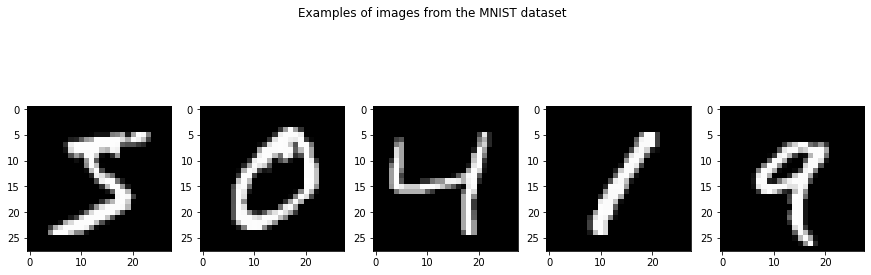

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))
for i in range(5) :
    axs[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.suptitle("Examples of images from the MNIST dataset")
plt.show()

We will train the algorithm to discriminate between 0s and 1s. We split data between train and test sets, we will need to evaluate each model obtained for each value of $\mu$.

In [9]:
# Only keep 0s and 1s in train and test sets

train_zip_filtered = [(X_train[i].flatten(), y_train[i]) for i in range(len(X_train)) if (y_train[i]==0 or y_train[i]==1)]
test_zip_filtered = [(X_test[i].flatten(), y_test[i]) for i in range(len(X_test)) if (y_test[i]==0 or y_test[i]==1)]

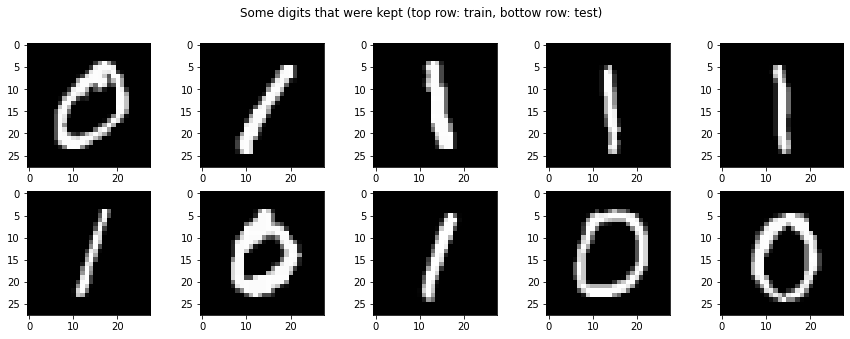

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

for i in range(5) :
    axs[0][i].imshow(train_zip_filtered[i][0].reshape(28, 28), cmap=plt.get_cmap('gray'))
    axs[1][i].imshow(test_zip_filtered[i][0].reshape(28, 28), cmap=plt.get_cmap('gray'))

plt.suptitle("Some digits that were kept (top row: train, bottow row: test)")
plt.show()

In [11]:
# Launch the global algorithm

mus = np.linspace(0, 1, 10)

X_train, y_train = [list(t) for t in zip(*train_zip_filtered[:100])]
X_test, y_test = [list(t) for t in zip(*test_zip_filtered[:100])]

# Convert from {0, 1} convention to {-1, 1} convention
y_train = np.where(np.array(y_train)==0, -1, 1)
y_test = np.where(np.array(y_test)==0, -1, 1)

k = 32
lambda0 = 0.5
lambda1 = 0.15 * lambda0
lambda2 = 1.2e-3
global_maxiter = 10

# for i in tqdm.tqdm(range(100)):
#     best_dictionary, best_parameter, classif_precision = supervised_dictionnary_learning(
#         mus,
#         X_train,
#         X_test,
#         y_train,
#         y_test,
#         k=k,
#         lambda0=lambda0,
#         lambda1=lambda1,
#         lambda2=lambda2,
#         global_maxiter=global_maxiter)

The code algorithm but takes too long to converge, we decided not to implement the fixed-point continuation method given it would take us too much time. We will use the knowledge gained by coding the algorithm in this paper to code the next one.

## 3 Online dictionary learning (based on ICML '09)

In this section, we do not consider the classification problem like in Section 2, we are instead interested in purely _reconstructive_ dictionaries. We present the online setting where we dynamically learn the dictionary. This setting is interesting when we consider video streams for instance, where frames come one at a time, or very large datasets where we can't use batch optimization.

### 3.1 Online dictionary learning

In a similar way as in Section 1, we consider the problem : 

$$
\underset{\mathbf{D} \in \mathcal{C}, \ \alpha \in \mathbb{R}^{k \times n}}{\min} \ \dfrac{1}{n} \sum_{i=1}^n (\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1) \qquad (*)
$$ 

At each time step $t=1,...,T$, we sample a signal $\mathbf{x}_t \in \mathbb{R}^{N}$ and adapt the dictionary based on this "new" observation. This can be useful for instance if the dataset size is too large, or if information is available in a dynamic way.

In our online learning setting, we denote :

$\mathbf{A} = [\mathbf{a}_1, ..., \mathbf{a}_k] \in \mathbb{R}^{k \times k} = \sum_{i=1}^t \boldsymbol{\alpha}_i \boldsymbol{\alpha}_i^\top$ 

$\mathbf{B} = [\mathbf{b}_1, ..., \mathbf{b}_k] \in \mathbb{R}^{N \times k} = \sum_{i=1}^t \mathbf{x}_i \boldsymbol{\alpha}_i^\top$

These matrices will be helpful when we want to update the dictionary by leveraging the nature of the problem. Note that at time $t$, we don't store all previous information, which could be intensive in memory, but rather use matrices that we update.


The online dictionary learning algorithm solves (*) by drawing a sample $\mathbf{x}_t$ and iterating between 2 steps :

(i) _Sparse coding_ : $\mathbf{D}_{t-1}$ is fixed, and we compute $\boldsymbol{\alpha}_t$ with LARS. We update 

$\mathbf{A}_t \leftarrow \mathbf{A}_{t-1} + \boldsymbol{\alpha}_t \boldsymbol{\alpha}_t^\top $

$\mathbf{B}_t \leftarrow \mathbf{B}_{t-1} + \mathbf{x}_t \boldsymbol{\alpha}_t^\top $

(ii) _Dictionary update_ : $\boldsymbol{\alpha}_t$ is fixed, we solve 

$$
\begin{array}{rcl}
\mathbf{D}_t & = & \underset{\mathbf{D} \in \mathcal{C}}{\min} \ \dfrac{1}{t} \sum_{i=1}^t (\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1) \\ \\
 & = & \dfrac{1}{t}(\dfrac{1}{2} Tr(\mathbf{D}^\top \mathbf{D} \mathbf{A}_t) - Tr(\mathbf{D}^\top \mathbf{B}_t) )
\end{array}
$$

That is to say for $j=1,...,k$ do :

$$
\begin{array}{rcl}
\mathbf{u}_j & \leftarrow & \dfrac{1}{\mathbf{A}_{jj}}(\mathbf{b}_j - \mathbf{D} \mathbf{a}_j) + \mathbf{d}_j\\ 
\mathbf{d}_j & \leftarrow & \dfrac{1}{\text{max}(\lVert \mathbf{u}_j \lVert_2, 1)} \mathbf{u}_j
\end{array}
$$

As opposed to batch methods, this method takes advantage of the structure of the data to significantly reduce computation time. The dictionary is updated using $\mathbf{D}_{t-1}$ as a warm restart because the dictionaries don't change a lot between updates. Note that we could also consider a _mini-batch setting_, where we sample multiple $\mathbf{x}_t$'s at each step. In the paper, the authors found that it considerably reduced computation time.

In [12]:
# Online Dictionary Learning for Sparse Coding (ICML 2009)

def dictionary_update(D, A, B):
    """ Update the dictionary in online fashion.

        :param D: dictionary that is updated
        :param A: matrix of alpha*alpha^T, keeps previous information
        :param B: matrix of x*alpha^T, keeps previous information

        :return D_new: updated dictionary
    """

    D_new = np.zeros_like(D)
    
    for i in range(D.shape[1]):
        D_new[:,i] = 1 / (A[i,i] + 1e-3) * (B[:,i] - D @ A[:,i]) + D[:,i]
        D_new[:,i] = 1 / max(np.linalg.norm(D_new[:,i]), 1) * D_new[:,i] # Normalize the columns of the dictionary

    return D_new


def online_dictionary_learning(X, k, nb_iter=200):
    """ Optimize the cost function with respect to D and alpha alternatively, with single-sample online update.

        :param X: samples of signal to reconstruct
        :param k: number of atoms in the dictionary
        :param nb_iter: number of iterations

        :return D: learned dictionary
    """
    
    D = rd.randn(X[0].size, k)
    A = np.zeros((k, k))
    B = np.zeros((X[0].size, k))

    lambd = 1.2 / np.sqrt(X[0].size) # Heuristic for the normalization factor
    reg = Lasso(lambd, max_iter=5000)

    iis = np.random.randint(0, X.shape[0], nb_iter)

    for i in range(nb_iter):
        X_sample = X[iis[i]]
        reg.fit(D, X_sample) # Update alpha
        alpha = reg.coef_

        A += np.outer(alpha, alpha)
        B += np.outer(X_sample, alpha)

        D = dictionary_update(D, A, B) # Update D

    return D

### 3.2  Gradient descent to compute the dictionary

Usually, the dictionary is updated using classical _stochastic gradient descent_, which for the update of $\mathbf{D}$ reads : 

$\mathbf{D}_{t} = \Pi_\mathcal{C}[\mathbf{D}_{t-1} \ - \ \dfrac{\rho}{t} \nabla_\mathbf{D} l(\mathbf{x},\mathbf{D}_{t-1})]$

Expanding the loss function after a small update 
$$ l (\mathbf{x}, \mathbf{D+H}) = \dfrac{1}{2} \lVert \mathbf{x} - (\mathbf{D}+\mathbf{H})\boldsymbol{\alpha} \rVert^2 + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 = \dfrac{1}{2} \lVert \mathbf{x} - \mathbf{D} \boldsymbol{\alpha} \rVert^2 + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 - \langle \mathbf{x} - \mathbf{D}\boldsymbol{\alpha}, \mathbf{H}\boldsymbol{\alpha} \rangle + \dfrac{1}{2} \lVert \mathbf{H}\boldsymbol{\alpha} \rVert^2 $$

and noting that 

$$ \langle \mathbf{x} - \mathbf{D}\boldsymbol{\alpha}, \mathbf{H}\boldsymbol{\alpha} \rangle = \langle (\mathbf{x} - \mathbf{D}\boldsymbol{\alpha})\boldsymbol{\alpha}^\top , \mathbf{H} \rangle_F $$

we can identify

$$ \nabla_\mathbf{D} l (\mathbf{x}, \mathbf{D}) = (\mathbf{D}\boldsymbol{\alpha} - \mathbf{x})\boldsymbol{\alpha}^\top $$

For this last equality we used a simple "trick" : if $\mathbf{u} \in \mathbb{R}^p$, $\mathbf{v} \in \mathbb{R}^q$, and $\mathbf{M}$ is a $p\times q$ matrix, then we can rewrite the scalar product 
$$
\langle \mathbf{u}, \mathbf{M}\mathbf{v} \rangle = \sum_{i=1}^p \sum_{j=1}^q u_i M_{ij} v_j
$$

as

$$
\sum_{i,j} u_i v_j M_{ij}
$$

which is the standard Frobenius scalar product $\langle \mathbf{u} \mathbf{v}^\top, \mathbf{M} \rangle_F$ between the matrices $\mathbf{u} \mathbf{v}^\top$ and $\mathbf{M}$.

In [13]:
# Stochastic gradient descent

def grad_i(D, alpha, X_sample):
    return np.outer(D @ alpha - X_sample, alpha)


def stochastic_dictionary_update(D_init, alpha, X, maxiter=100, step=1000):
    """ Stochastic gradient descent algorithm (with projection onto the set of Nxk matrices with unit norm columns).

        :param D_init: initial value of D before the descent
        :param alpha: vector of coefficients
        :param X: dataset
        :param maxiter: maximum number of iterations
        :param step: learning rate

        :return D: last updated dictionary
    """

    D = D_init.copy()
    
    iis = np.random.randint(0, X.shape[0], maxiter) # To sample observations

    for i in range(maxiter):
        X_sample = X[iis[i]]
        
        D = D - step / np.sqrt(i + 1) * grad_i(D, alpha, X_sample) # SGD with decaying step
        
        for i in range(D.shape[1]):
            D[:,i] = 1 / max(np.linalg.norm(D[:,i]), 1) * D[:,i] # Projection onto the set C

    return D


def stochastic_dictionary_learning(X, k, nb_iter=200):
    """ Optimize the cost function with respect to D and alpha alternatively, with single-sample stochastic update.

        :param X: samples of signal to reconstruct
        :param k: number of atoms in the dictionary
        :param nb_iter: number of iterations
        
        :return D: learned dictionary
    """

    D = rd.randn(X[0].size, k)
    
    lambd = 1.2 / np.sqrt(X[0].size)
    reg = Lasso(lambd, max_iter=5000)

    iis = np.random.randint(0, X.shape[0], nb_iter)
    
    for i in range(nb_iter):
        X_sample = X[iis[i]]
        reg.fit(D, X_sample) # Update alpha
        alpha = reg.coef_

        D = stochastic_dictionary_update(D, alpha, X) # Update D
    
    return D

In the article, authors also propose minibatch extensions and heuristics to choose the minibatch size.

### 3.3 Learning a dictionary from the MNIST dataset

As in the first section, we will train our algorithm on the MNIST dataset. This time, the task is a purely reconstructive one, as opposed to a discriminative one. As in the article, we divide the image into patches and work on patches directly.

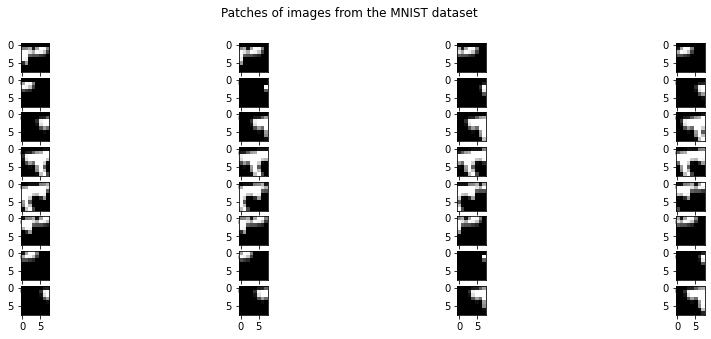

In [14]:
# Create patches from the first image

(X_train, y_train), (X_test, y_test) = mnist.load_data()

patch_size = 8
patches = image.extract_patches_2d(X_train[0], (patch_size, patch_size))

count = -1

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 5))
for i in range(8) :
    for j in range(4) :
        count += 1
        im = axs[i][j].imshow(patches[100 + count], cmap=plt.get_cmap('gray'))
    
plt.suptitle("Patches of images from the MNIST dataset")
plt.show()

In [15]:
# Transform all images into patches

vectorized_train_patches = []
vectorized_test_patches = []

for i in range(10000):
    patches = image.extract_patches_2d(X_train[i], (patch_size, patch_size))
    for j in range(patches.shape[0]):
        vectorized_train_patches.append(patches[j].flatten())

for i in range(10000):
    patches = image.extract_patches_2d(X_test[i], (patch_size, patch_size))
    for j in range(patches.shape[0]):
        vectorized_test_patches.append(patches[j].flatten())

vectorized_train_patches = np.array(vectorized_train_patches)
vectorized_test_patches = np.array(vectorized_test_patches)

In [16]:
# Learn the dictionaries

k = 32

t0 = time()

dictionary = online_dictionary_learning(vectorized_train_patches, k, nb_iter=20000)
t1 = time()

stochastic_dictionary = stochastic_dictionary_learning(vectorized_train_patches, k, nb_iter=5000)
t2 = time()

/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [17]:
# Compare training times

dt1 = t1 - t0
dt2 = t2 - t1

print(f'The online dictionary was learned in {dt1:.2f}s, and the stochastic dictionary in {dt2:.2f}s')

The online dictionary was learned in 43.87s, and the stochastic dictionary in 150.68s


Online updates are way faster than stochastic updates.

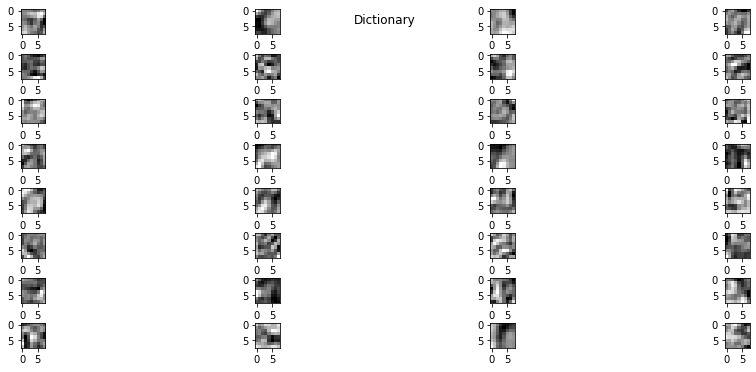

In [18]:
# Plot the dictionary
count = -1

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 5))
for i in range(8) :
    for j in range(4) :
        count += 1
        im = axs[i][j].imshow(dictionary[:,count].reshape(8, 8), cmap=plt.get_cmap('gray'))

fig.tight_layout(pad=0.1)
plt.suptitle("Dictionary")
plt.show()

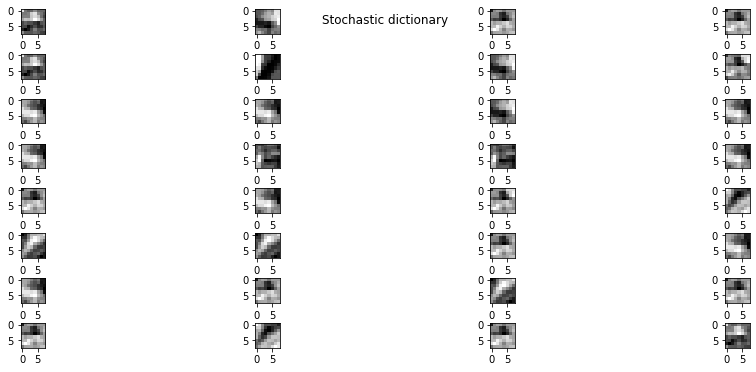

In [19]:
# Plot the stochastic dictionary
count=-1

fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15, 5))
# plt.tight_layout(w_pad=0.25)
for i in range(8) :
    for j in range(4) :
        count += 1
        im = axs[i][j].imshow(stochastic_dictionary[:,count].reshape(8, 8), cmap=plt.get_cmap('gray'))

fig.tight_layout(pad=0.1)
plt.suptitle("Stochastic dictionary")
plt.show()

In [20]:
# Reconstuct test set

def reconstruct_test_set(test_set, learned_dictionary):
    coeffs = []

    lambd = 1.2 / np.sqrt(test_set[0].size)
    reg = Lasso(lambd, max_iter=500)
        
    for i in range(len(test_set)):
        reg.fit(learned_dictionary, test_set[i])
        coeffs.append(reg.coef_)
    
    return coeffs

coeffs_test_set = reconstruct_test_set(vectorized_test_patches[:20000], dictionary)
stochastic_coeff_test_set = reconstruct_test_set(vectorized_test_patches[:20000], stochastic_dictionary)

/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/dictionary-learning/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the featu

In [21]:
# Reconstruct dataset from Dictionary

reconstructed_dataset = []
stochastic_reconstructed_dataset = []

for i in range(len(coeffs_test_set)):
    reconstructed_dataset.append(dictionary @ coeffs_test_set[i])
    stochastic_reconstructed_dataset.append(stochastic_dictionary @ stochastic_coeff_test_set[i])

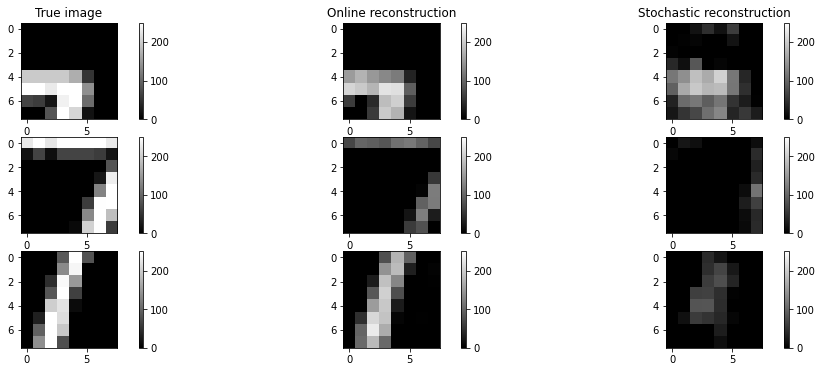

In [22]:
# Plot 3 random reconstructed patches

_min, _max = 0, 250

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,5))

im00 = axs[0][0].imshow(vectorized_test_patches[100].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im00, ax=axs[0][0])
im01 = axs[0][1].imshow(reconstructed_dataset[100].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im01, ax=axs[0][1])
im02 = axs[0][2].imshow(stochastic_reconstructed_dataset[100].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im02, ax=axs[0][2])

im10 = axs[1][0].imshow(vectorized_test_patches[200].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im10, ax=axs[1][0])
im11 = axs[1][1].imshow(reconstructed_dataset[200].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im11, ax=axs[1][1])
im12 = axs[1][2].imshow(stochastic_reconstructed_dataset[200].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im12, ax=axs[1][2])

im20 = axs[2][0].imshow(vectorized_test_patches[1000].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im20, ax=axs[2][0])
im21 = axs[2][1].imshow(reconstructed_dataset[1000].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im21, ax=axs[2][1])
im22 = axs[2][2].imshow(stochastic_reconstructed_dataset[1000].reshape(8,8), cmap=plt.get_cmap('gray'), vmin = _min, vmax = _max)
fig.colorbar(im22, ax=axs[2][2])

axs[0][0].set_title("True image")
axs[0][1].set_title("Online reconstruction")
axs[0][2].set_title("Stochastic reconstruction")

fig.tight_layout(pad=0.1)
plt.show()

We can see that the reconstruction is way better for the online dictionary.

In [23]:
# Evaluate on test set

online_loss = np.linalg.norm(vectorized_test_patches[:20000] - reconstructed_dataset, ord=2)
online_loss += 1.2 / np.sqrt(reconstructed_dataset[0].size) * np.linalg.norm(coeffs_test_set, ord=1)
online_loss = online_loss / 20000

stochastic_loss = np.linalg.norm(vectorized_test_patches[:20000] - stochastic_reconstructed_dataset, ord=2)
stochastic_loss += 1.2 / np.sqrt(stochastic_reconstructed_dataset[0].size) * np.linalg.norm(stochastic_coeff_test_set, ord=1)
stochastic_loss = stochastic_loss / 20000

print(f'Online loss = {online_loss:.3f}, stochastic loss = {stochastic_loss:.3f}')

Online loss = 25.896, stochastic loss = 29.285


The online dictionary is faster to learn than the stochastic one, and yields a smaller loss.

## 4. Some insights into more recent uses of dictionary learning

### 4.1 From euclidean dictionaries to general dictionaries

If we forget for a moment the $\ell_1$ penalty, the remaining objective function that we want to minimize to compute the representation of a single vector $\mathbf{x}$ with respect to a dictionary $\mathbf{D}$ is

$$
\underset{\alpha_1, \dots, \alpha_k}{\min} \lVert \mathbf{x} - \sum_{i=1}^k \alpha_i \mathbf{d}_i \rVert^2
$$

Which can be interpreted as finding the barycenter of atoms $\mathbf{d}_1, \dots, \mathbf{d}_k$ that is closest to $\mathbf{x}$ with respect to the euclidean distance. This being said, we can replace the euclidean distance with any other distance that will better take into account the natural geometry of the problem at hand, and that geometry does not have to be the euclidean geometry. This is how we can generalize the idea of dictionary learning to any other type of data lying in a metric space $(\mathcal{E}, d)$. In such a setting the coefficients are computed in two steps : given some coefficients $\alpha_1, \dots, \alpha_k$, the barycenter of the atoms is defined as 

$$
\mathbf{d}^*(\alpha_1, \dots, \alpha_k) = \underset{\mathbf{d} \in \mathcal{E}}{\arg \min} \sum_{i=1}^k \alpha_i \, d(\mathbf{d}, \mathbf{d}_i)
$$

then the optimal coefficients for a point $\mathbf{x}$ are defined as 

$$
\alpha_1^*, \dots, \alpha_k^* = \underset{\alpha_1, \dots, \alpha_k}{\arg \min} \ d(\mathbf{x}, \mathbf{d}^*(\alpha_1, \dots, \alpha_k))
$$

### 4.2 Dictionaries in Topological Data Analysis

One of the core tools in topological data analysis (TDA) is the persistence diagram. It is an object that encapsulates a simple topological signature of complex objects, typically compact submanifolds of $\mathbb{R}^d$. Here, the sparsity lies in the fact that we can represent some very complicated topological objects by a much simpler _summary_. 

We will not delve into the details of TDA, but show a less straightforward use of dictionary learning. One of the key ideas of TDA is to only store compact representations of data instead of the data itself. This idea is viable due to the fact that persistence diagrams enjoy a lot of stability properties that make them "good" representations of the data in some sense. Once the space of persistence diagrams is endowed with a metric, it is then possible to define the notion of dictionaries and mixing coefficients just like in the classical euclidean setting, with the general notion of dictionary and coefficients explained above. 

<img src="imgs/persistence_diagrams.jpg" alt="drawing" width="600"/>

The space of persistence diagrams can be endowed with a family of Wasserstein-like distance functions. A diagram can be seen as a discrete measure in $\mathbb{R}^2$, so it can be equiped with the classical $p$-Wasserstein distance $W_p$. 

<img src="imgs/distance_between_diagrams.jpg" alt="drawing" width="600"/>

the two illustrations above were taken from Frederic Chazal's course (see https://geometrica.saclay.inria.fr/team/Fred.Chazal/M2Orsay2021.htm).

## 5. Conclusion

In dictionary learning, the goal is to find a _sparse_ representation of a vector $\mathbf{x}$ in a dictionary $\mathbf{D}$, that is to say, $\mathbf{x} \approx \sum_{i=1}^k \alpha_i \mathbf{d}_i$. When it was first introduced, dictionary learning aimed at learning the coefficients $\boldsymbol{\alpha}$, but recent works around _adaptive_ dictionary learning also learn the dictionary.

This joint optimization problem reads: 
$$
\underset{\mathbf{D} \in \mathcal{C}, \ \alpha \in \mathbb{R}^{k \times n}}{\min} \ \dfrac{1}{n} \sum_{i=1}^n \left(\dfrac{1}{2} \lVert\mathbf{x}_i - \mathbf{D} \boldsymbol{\alpha}_i \lVert_2^2 \ + \ \lambda \lVert\boldsymbol{\alpha}_i\lVert_1 \right)
$$
and is solved by alternatively optimizing $\boldsymbol{\alpha}$ (sparse coding step) and optimizing $\mathbf{D}$ (dictionary update step).

We presented two papers where the cost function is modified to better fit the task at hand : supervised dictionary learning, and online dictionary learning. The first one aims at learning both a classifier and the dictionary with the associated coefficients, while the latter proposes an alternative to batch methods which can be computationally intensive in high-dimension. We fully implemented the two algorithms and showed that the second one was able to learn the sparse representation of $\mathbf{x}$, while being quicker and yielding a smaller loss function than the alternative of stochastic dictionary learning.